<a href="https://colab.research.google.com/github/G-Mazzeo/machine-learning_UTN/blob/main/TP1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## TP1



In [2]:
from google.colab import drive #importamos drive para conectarnos

drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [129]:
#Importamos librerias necesarias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, label_binarize
import time


In [5]:
df_inicial = pd.read_csv("/content/gdrive/MyDrive/Colab-Notebooks/TP1/dataset/bank-full.csv", delimiter = ';')
df_inicial

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [6]:
df_inicial.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [7]:
df_inicial.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [19]:
df_inicial.groupby(['poutcome']).size()

poutcome
failure     4901
other       1840
success     1511
unknown    36959
dtype: int64

Descartamos la columna 'duration' ya que esta directamente relacionada con el resultado final pero en la realidad es un dato que contamos despues de saber el resultado (Ver notas en la documentacion del dataset

In [22]:
df = df_inicial.drop('duration', axis=1)
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,4,-1,0,unknown,no


Vemos que en varias columnas hay filas con datos desconocidos (unknown)
Reemplazamos unknown con nan para contar la cantidad y creamos un nuevo df_nan para un futuro analisis.

In [21]:
df_nan = df_inicial.replace('unknown',np.nan)
df_nan.isna().sum()

age              0
job            288
marital          0
education     1857
default          0
balance          0
housing          0
loan             0
contact      13020
day              0
month            0
duration         0
campaign         0
pdays            0
previous         0
poutcome     36959
y                0
dtype: int64

##**Visualizamos la distribusion de los datos numericos**

In [98]:
print(df[df.balance < 0]['balance']) #hay gente que tiene balance negativo.

25      -372
28      -246
36        -7
37        -3
45      -171
        ... 
44626   -205
44629    -46
44836   -195
44908   -130
44964    -42
Name: balance, Length: 3766, dtype: int64


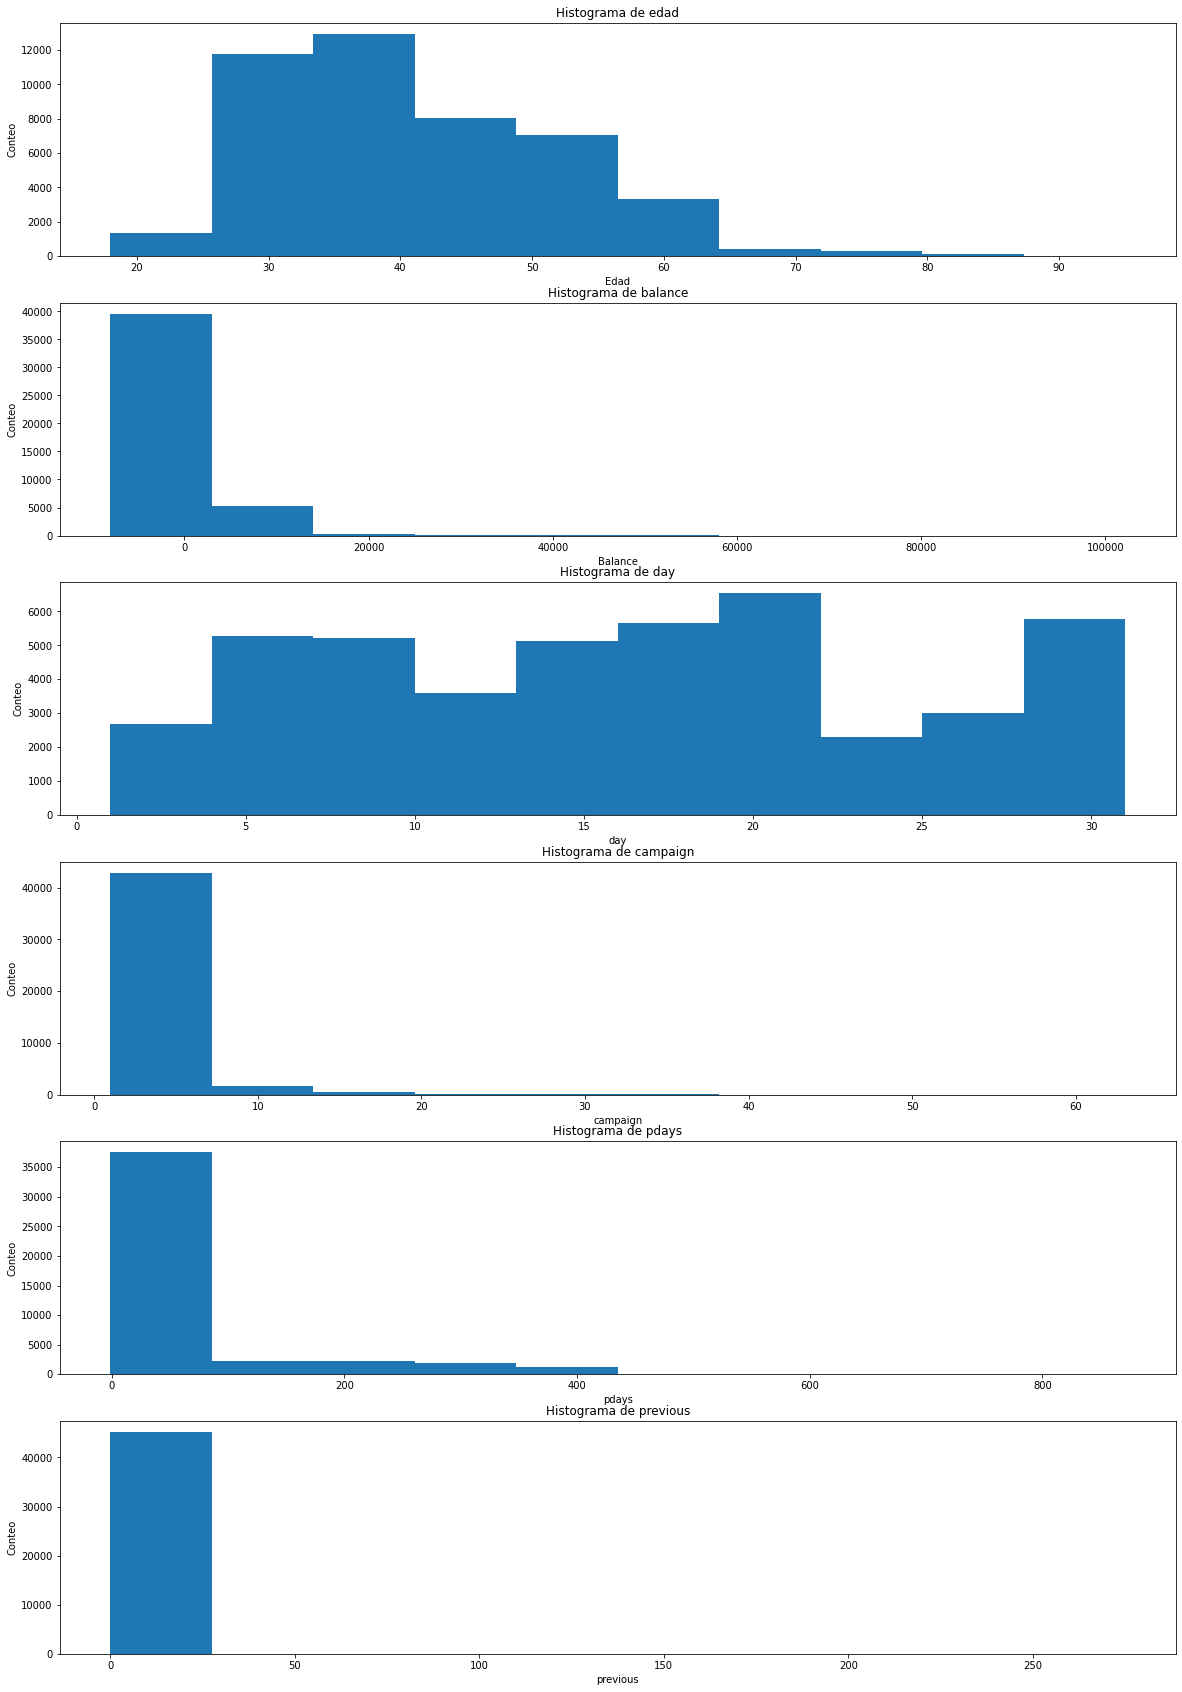

In [84]:
plt.figure(figsize=(20, 30))

plt.subplot(611)
plt.hist(df['age'])
plt.title('Histograma de edad')
plt.xlabel('Edad')
plt.ylabel('Conteo')

plt.subplot(612)
plt.hist(df['balance'])
plt.title('Histograma de balance')
plt.xlabel('Balance')
plt.ylabel('Conteo')

plt.subplot(613)
plt.hist(df['day'])
plt.title('Histograma de day')
plt.xlabel('day')
plt.ylabel('Conteo')

plt.subplot(614)
plt.hist(df['campaign'])
plt.title('Histograma de campaign')
plt.xlabel('campaign')
plt.ylabel('Conteo')

plt.subplot(615)
plt.hist(df['pdays'])
plt.title('Histograma de pdays')
plt.xlabel('pdays')
plt.ylabel('Conteo')

plt.subplot(616)
plt.hist(df['previous'])
plt.title('Histograma de previous')
plt.xlabel('previous')
plt.ylabel('Conteo')

plt.show()

Vemos que en balance hay un rango muy amplio de datos numericos.
vamos a normalizar los datos con un scaler

In [101]:
scaler = MinMaxScaler() # default=(0, 1)
numerical = ['age', 'balance', 'day', 'campaign', 'pdays','previous']

features_minmax_transform = df
features_minmax_transform[numerical] = scaler.fit_transform(df[numerical])

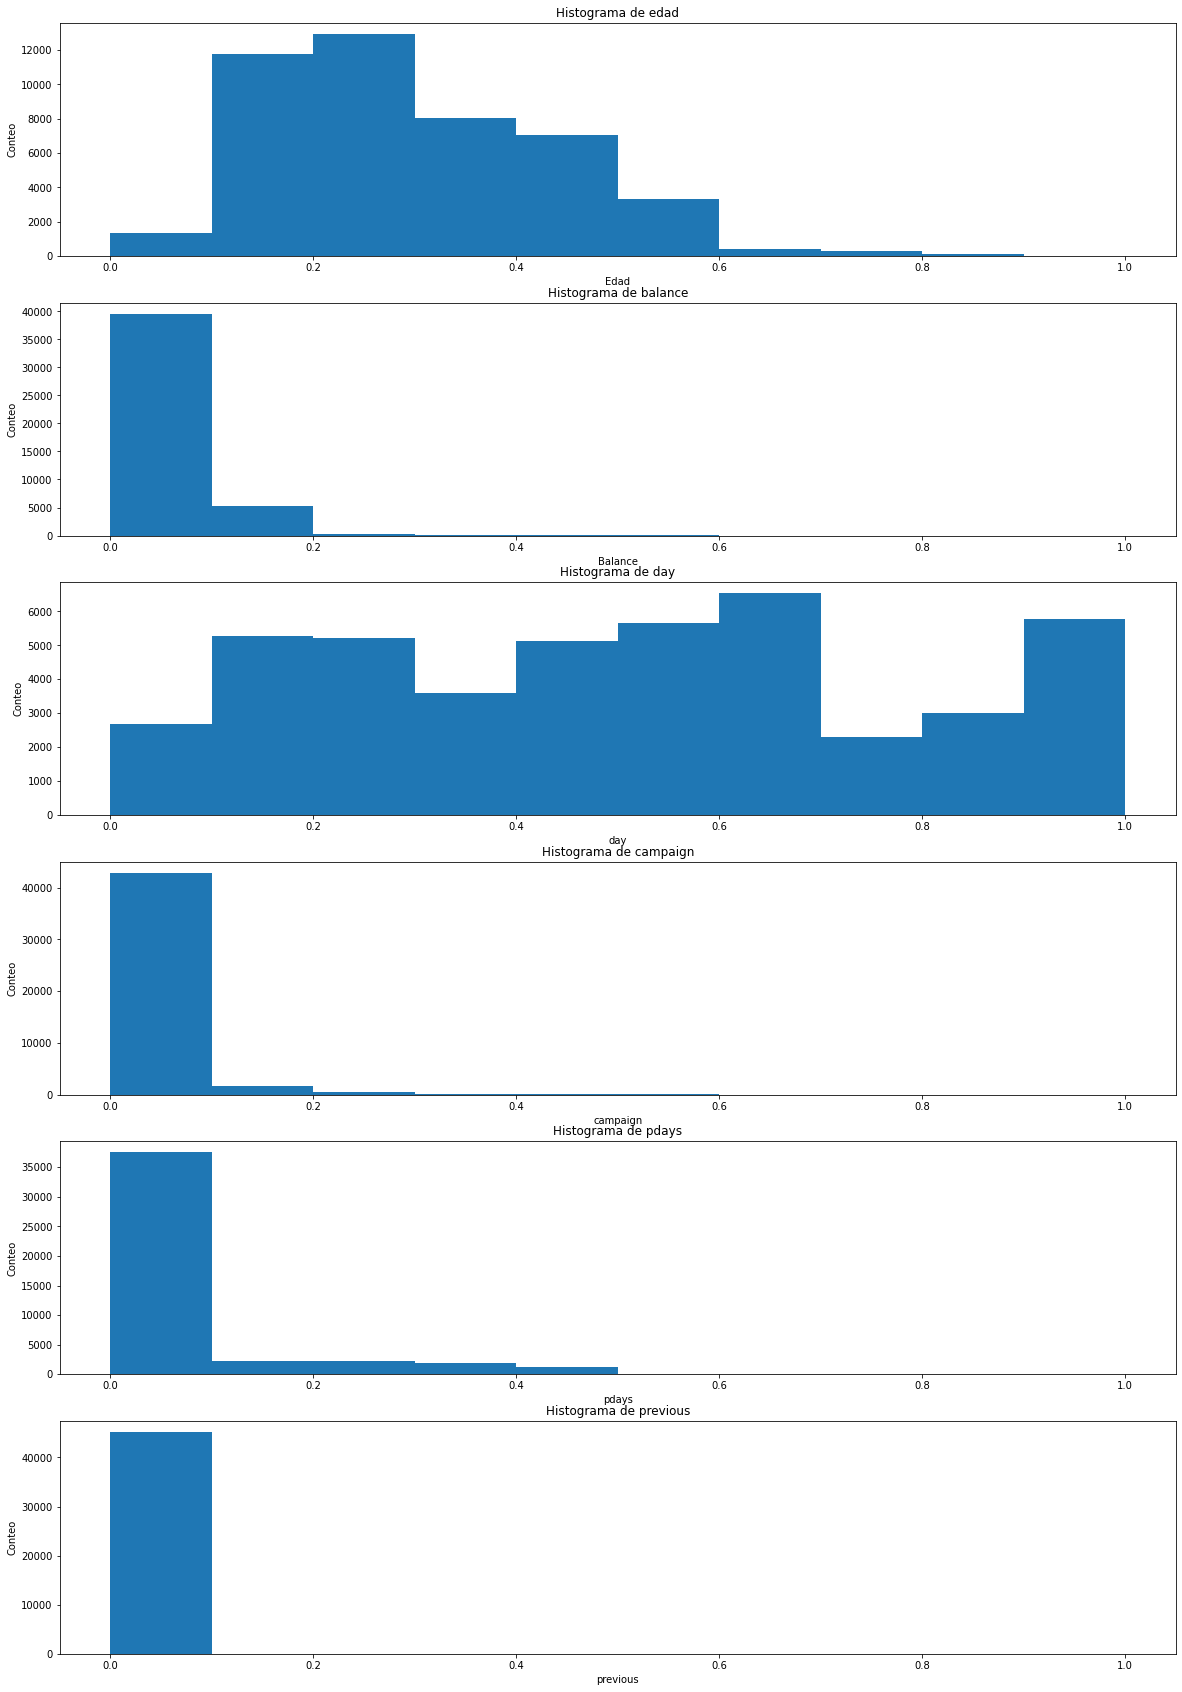

In [103]:
plt.figure(figsize=(20, 30))

plt.subplot(611)
plt.hist(features_minmax_transform['age'])
plt.title('Histograma de edad')
plt.xlabel('Edad')
plt.ylabel('Conteo')

plt.subplot(612)
plt.hist(features_minmax_transform['balance'])
plt.title('Histograma de balance')
plt.xlabel('Balance')
plt.ylabel('Conteo')

plt.subplot(613)
plt.hist(features_minmax_transform['day'])
plt.title('Histograma de day')
plt.xlabel('day')
plt.ylabel('Conteo')

plt.subplot(614)
plt.hist(features_minmax_transform['campaign'])
plt.title('Histograma de campaign')
plt.xlabel('campaign')
plt.ylabel('Conteo')

plt.subplot(615)
plt.hist(features_minmax_transform['pdays'])
plt.title('Histograma de pdays')
plt.xlabel('pdays')
plt.ylabel('Conteo')

plt.subplot(616)
plt.hist(features_minmax_transform['previous'])
plt.title('Histograma de previous')
plt.xlabel('previous')
plt.ylabel('Conteo')

plt.show()

##**Balance entre clases**

In [34]:
df_inicial.groupby(['y']).size()*100/df_inicial['y'].size

y
no     88.30152
yes    11.69848
dtype: float64

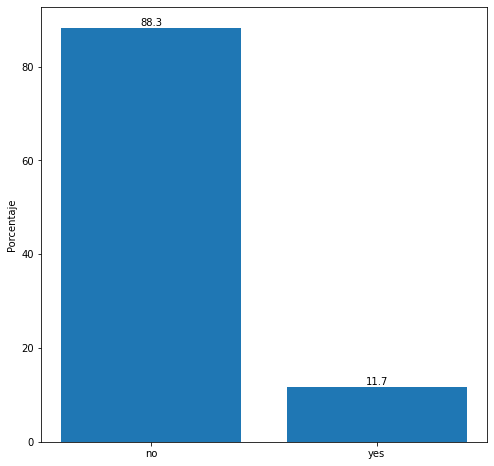

In [39]:
y_value= df_inicial.groupby(['y']).size()*100/df_inicial['y'].size
x_value= df_inicial['y'].unique()

plt.figure(figsize=(8, 8))
plt.bar(x_value, y_value )
plt.ylabel("Porcentaje")

for i in range(len(y_value)):
    plt.annotate(str(round(y_value[i],1)), xy=(x_value[i],y_value[i]), ha='center', va='bottom')

plt.show()



##**Asignamos a las categorias de texto un numero**

In [116]:
df.loc[:, 'y'] = label_binarize(df['y'], classes=['no', 'yes'])

In [117]:
cat_cols = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']

for col in cat_cols:
  print(col)
  print(pd.Categorical(df[col]).categories)
  df.loc[:, col] = pd.Categorical(df[col]).codes

df


job
Int64Index([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11], dtype='int64')
marital
Int64Index([0, 1, 2], dtype='int64')
education
Int64Index([0, 1, 2, 3], dtype='int64')
default
Int64Index([0, 1], dtype='int64')
housing
Int64Index([0, 1], dtype='int64')
loan
Int64Index([0, 1], dtype='int64')
contact
Int64Index([0, 1, 2], dtype='int64')
month
Int64Index([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11], dtype='int64')
poutcome
Int64Index([0, 1, 2, 3], dtype='int64')


,age,job,marital,education,default,balance,housing,loan,contact,day,month,campaign,pdays,previous,poutcome,y
0,0.519481,4,1,2,0,0.092259,1,0,2,0.133333,8,0.000000,0.000000,0.000000,3,0
1,0.337662,9,2,1,0,0.073067,1,0,2,0.133333,8,0.000000,0.000000,0.000000,3,0
2,0.194805,2,1,1,0,0.072822,1,1,2,0.133333,8,0.000000,0.000000,0.000000,3,0
3,0.376623,1,1,3,0,0.086476,1,0,2,0.133333,8,0.000000,0.000000,0.000000,3,0
4,0.194805,11,2,3,0,0.072812,0,0,2,0.133333,8,0.000000,0.000000,0.000000,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,0.428571,9,1,2,0,0.080293,0,0,0,0.533333,9,0.032258,0.000000,0.000000,3,1
45207,0.688312,5,0,0,0,0.088501,0,0,0,0.533333,9,0.016129,0.000000,0.000000,3,1
45208,0.701299,5,1,1,0,0.124689,0,0,0,0.533333,9,0.064516,0.212156,0.010909,2,1
45209,0.506494,1,1,1,0,0.078868,0,0,1,0.533333,9,0.048387,0.000000,0.000000,3,0


##**Dividimos set de entrenamiento y set de test**

In [124]:
X = df.drop('y', axis=1)
y = df['y']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [119]:
y

0        0
1        0
2        0
3        0
4        0
        ..
45206    1
45207    1
45208    1
45209    0
45210    0
Name: y, Length: 45211, dtype: int64

Me baso en esto https://medium.com/datos-y-ciencia/proyecto-de-clasificaci%C3%B3n-de-machine-learning-encontrar-donantes-64a0c4dbcd34

In [125]:
# Counting the ones as this is the naive case. Note that 'income' is the 'income_raw' data encoded to numerical values done in the data preprocessing step.
TP = np.sum(y)
# Specific to the naive case
FP = y.count() - TP
# No predicted negatives in the naive case
TN = 0 
FN = 0 

# Calculate accuracy, precision and recall
accuracy = TP / (TP + FP + TN + FN)
recall = TP / (TP + FN)
precision = TP / (TP + FP)

# Calculate F-score using the formula above for beta = 0.5 and correct values for precision and recall.
beta = 0.5
fscore = (1 + beta**2) * ((precision * recall) / ((beta**2) * precision + recall))

# Print the results 
print("Naive Predictor: [Accuracy score: {:.4f}, F-score: {:.4f}]".format(accuracy, fscore))

Naive Predictor: [Accuracy score: 0.1170, F-score: 0.1421]


In [137]:
# Import two metrics from sklearn - fbeta_score and accuracy_score
def train_predict(learner, sample_size, X_train, y_train, X_test, y_test): 
    '''
    inputs:
       - learner: the learning algorithm to be trained and predicted on
       - sample_size: the size of samples (number) to be drawn from training set
       - X_train: features training set
       - y_train: income training set
       - X_test: features testing set
       - y_test: income testing set
    '''
    
    results = {}
    
    # Fit the learner to the training data 
    #start = time() # Get start time
    learner = learner.fit(X_train[:sample_size], y_train[:sample_size])
    #end = time() # Get end time
    
    # Calculate the training time
    #results['train_time'] = end - start 
        
    # Get the predictions on the test set
    #start = time() # Get start time
    predictions_test = learner.predict(X_test)
    predictions_train = learner.predict(X_train[:300])
    #end = time() # Get end time
    
    # Calculate the total prediction time
    #results['pred_time'] = end -start
            
    # Compute accuracy on the first 300 training samples 
    results['acc_train'] = accuracy_score(y_train[:300], predictions_train)
        
    # Compute accuracy on test set using accuracy_score()
    results['acc_test'] = accuracy_score(y_test, predictions_test)
    
    # Compute F-score on the the first 300 training samples
    results['f_train'] = fbeta_score(y_train[:300], predictions_train, beta=0.5)
        
    # Compute F-score on the test set which is y_test
    results['f_test'] = fbeta_score(y_test, predictions_test, beta=0.5)
       
    # Success
    print("{} trained on {} samples.".format(learner.__class__.__name__, sample_size))
        
    # Return the results
    return results

In [141]:
# Import the three supervised learning models from sklearn
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, fbeta_score

# Initialize the three models
random_state = 42

clf_A = RandomForestClassifier(random_state=random_state)
clf_B = GaussianNB()
clf_C = SVC(random_state=random_state)

# Calculate the number of samples for 1%, 10%, and 100% of the training data
samples_100 = len(y_train)
samples_10 = int(len(y_train)/10)
samples_1 = int(len(y_train)/100)

# Collect results on the learners
results = {}
for clf in [clf_A, clf_B, clf_C]:
    clf_name = clf.__class__.__name__
    results[clf_name] = {}
    for i, samples in enumerate([samples_1, samples_10,   samples_100]):
        results[clf_name][i] = train_predict(clf, samples, X_train, y_train, X_test, y_test)

# Run metrics visualization for the three supervised learning models chosen
#vs.evaluate(results, accuracy, fscore)

RandomForestClassifier trained on 361 samples.
RandomForestClassifier trained on 3616 samples.
RandomForestClassifier trained on 36168 samples.
GaussianNB trained on 361 samples.
GaussianNB trained on 3616 samples.
GaussianNB trained on 36168 samples.
SVC trained on 361 samples.
SVC trained on 3616 samples.
SVC trained on 36168 samples.


In [149]:
results

{'GaussianNB': {0: {'acc_test': 0.8057060709941392,
   'acc_train': 0.8366666666666667,
   'f_test': 0.26421554033938677,
   'f_train': 0.33185840707964603},
  1: {'acc_test': 0.7445537985181908,
   'acc_train': 0.75,
   'f_test': 0.2613223772214791,
   'f_train': 0.2070063694267516},
  2: {'acc_test': 0.7980758597810461,
   'acc_train': 0.83,
   'f_test': 0.2772568979373159,
   'f_train': 0.2981651376146789}},
 'RandomForestClassifier': {0: {'acc_test': 0.8845515868627668,
   'acc_train': 1.0,
   'f_test': 0.25773195876288657,
   'f_train': 1.0},
  1: {'acc_test': 0.8914077186774301,
   'acc_train': 1.0,
   'f_test': 0.4033728350045579,
   'f_train': 1.0},
  2: {'acc_test': 0.8926241291606768,
   'acc_train': 1.0,
   'f_test': 0.44566067240031265,
   'f_train': 1.0}},
 'SVC': {0: {'acc_test': 0.8838880902355413,
   'acc_train': 0.9,
   'f_test': 0.0,
   'f_train': 0.0},
  1: {'acc_test': 0.8838880902355413,
   'acc_train': 0.9,
   'f_test': 0.0,
   'f_train': 0.0},
  2: {'acc_test': 0